# Prediction



Now we are going directly to predict the model output on test_set.csv


In [1]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

from keras.models import Model
from keras.models import model_from_json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

In [2]:
df = pd.read_csv('test_set.csv')

In [3]:
y = df['diag_Code']
X = df.drop('diag_Code', axis = 1)

In [57]:
# load json and create model
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
# load weights into new model
autoencoder.load_weights("model_final.h5")
print("Loaded model from disk")

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

print(autoencoder.summary())

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 2390)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 2000)              4782000   
_________________________________________________________________
dense_114 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dense_115 (Dense)            (None, 1000)              1501000   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 500)               500500    
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)             

In [58]:
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.layers.pop()
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 2390)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 2000)              4782000   
_________________________________________________________________
dense_114 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dense_115 (Dense)            (None, 1000)              1501000   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 500)               500500    
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)               0         
__________

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [84]:
autoencoder.layers[-1].output

<tf.Tensor 'dense_119_4/Tanh:0' shape=(?, 10) dtype=float32>

In [60]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [77]:
X_test_scaled = minmax_scale(X, feature_range=(-1,1), axis=1)
X_test_scaled.shape

(44, 2390)

In [78]:
### Define the encoder dimension
encoding_dim = 10


encoder = Model(inputs = autoencoder.layers[0].input, outputs= autoencoder.layers[10].output)
encoded_input = Input(shape = (encoding_dim, ))


encoded_test = pd.DataFrame(encoder.predict(X_test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

encoded_test.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.991390,0.860200,0.758664,-0.767006,0.998014,-0.985883,0.842945,-0.961233,0.541392,-0.767559
1,-0.993247,-0.824117,-0.780591,0.834246,-0.997852,0.986275,-0.823075,0.970200,-0.513049,0.746768
2,-0.993117,-0.826937,-0.790040,0.828655,-0.997939,0.986612,-0.817240,0.969998,-0.552925,0.731219
3,-0.993526,-0.826755,-0.787673,0.836196,-0.997730,0.986663,-0.824404,0.970830,-0.506849,0.736907
4,-0.992847,-0.828603,-0.782625,0.823207,-0.998024,0.986156,-0.825994,0.969659,-0.534607,0.755713
5,-0.993101,-0.832143,-0.771430,0.823526,-0.997893,0.986211,-0.816972,0.968511,-0.513371,0.736804
6,-0.993626,-0.842407,-0.831790,0.846432,-0.997489,0.986856,-0.840588,0.965518,-0.582412,0.701383
7,-0.993494,-0.841239,-0.821460,0.830082,-0.997597,0.987071,-0.831585,0.965365,-0.547448,0.717965
8,-0.993057,-0.828618,-0.788149,0.834945,-0.997933,0.986195,-0.827973,0.970089,-0.531995,0.745591
9,-0.990860,-0.795529,-0.804770,0.863011,-0.998831,0.981893,-0.791473,0.963104,-0.714118,0.656817


In [85]:
# load the model from disk
knn_model = pickle.load(open('knnpickle_file', 'rb'))
y_hat = knn_model.predict(encoded_test) 
y_test = y

In [87]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig



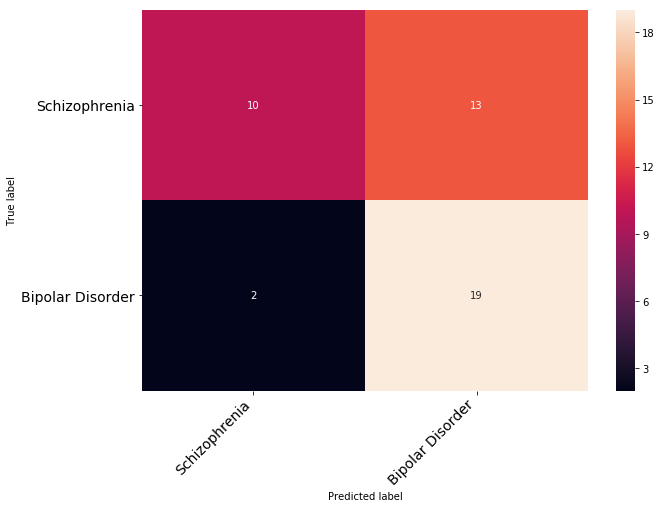

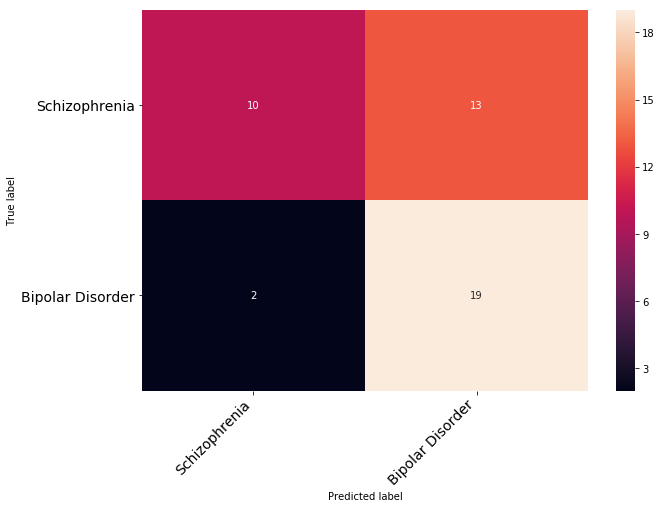

In [88]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_hat)
names = ['Schizophrenia','Bipolar Disorder']
print_confusion_matrix(c,names)

In [89]:
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

                  precision    recall  f1-score   support

   Schizophrenia       0.83      0.43      0.57        23
Bipolar Disorder       0.59      0.90      0.72        21

       micro avg       0.66      0.66      0.66        44
       macro avg       0.71      0.67      0.64        44
    weighted avg       0.72      0.66      0.64        44

Accuracy Score:  0.6590909090909091


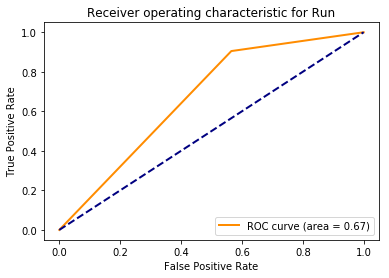

In [90]:
#plt.figure(figsize=(10,10))

fpr, tpr, _ = roc_curve(y_test, y_hat, pos_label=1)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Run')
plt.legend(loc="lower right")


plt.show()

